<a href="https://colab.research.google.com/github/Joan-George/tf-image-recognition/blob/master/image_recognition_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fmnist = tf.keras.datasets.fashion_mnist

print(dir(fmnist))

(training_images, training_labels), (testing_images, testing_labels) = fmnist.load_data()

print(training_images[0])

plt.imshow(training_images[0],cmap='gray')

In [ ]:
# Creating model to recognize the images

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(testing_images, testing_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 3.6625 - accuracy: 0.6931
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7389 - accuracy: 0.7387
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6267 - accuracy: 0.7747
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6096 - accuracy: 0.7797
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5933 - accuracy: 0.7908

MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 0.6150 - accuracy: 0.7758


In [ ]:
# In this section we are going to add the Convention Neural Layer and Pooling Layer to the model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

#summary of model
model.summary()

# Model compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model fit
model.fit(training_images , training_labels, epochs=5)

# Model Evaluation
model.evaluate(testing_images,testing_labels)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

[0.323906809091568, 0.8891000151634216]

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]
1/1 [==============================] - 0s 23ms/step


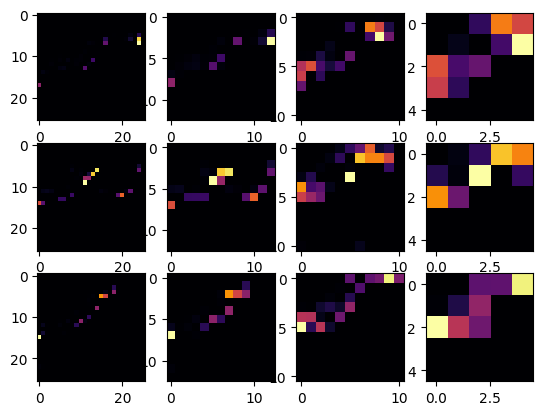

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

print(testing_labels[:100])
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(testing_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(testing_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(testing_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [ ]:
from scipy.datasets import ascent

# load the ascent image
ascent_image = ascent()

print(ascent_image)

[[ 83  83  83  83  83  83  83  82  82  82  82  82  82  82  82  82  82  83
   83  83  83  83  83  83  82  82  82  82  82  82  82  82  82  85  86  85
   85  85  86  86  86  85  85  85  85  85  85  85  85  85  85  85  85  85
   85  85  85  85  86  84  85  86  85  85  85  85  86  88  87  87  87  87
   87  87  87  87  87  87  87  87  87  87  87  87  87  87  87  87  87  87
   87  87  87  87  89  91  90  91  90  90  90  90  91  88  87  90  90  90
   90  90  90  90  90  90  90  90  90  90  90  90  90  91  91  90  90  90
   90  90  90  91  92  92  92  92  92  92  92  92  92  92  92  92  92  92
   92  92  92  92  92  92  92  92  92  92  92  93  95  95  96  93  92  95
   95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95
   95  95  95  95  95  95  95  95  95  97  97  97  97  97  97  97  97  97
   97  97  97  97  97  97  97  97  97  97  97  97  97  97 100 100  97  97
   97  99 101 100 100 100 100 101  98  94  79  81  82  84  82  86  84  86
   78  82  77  79  73  80  89  88  82 

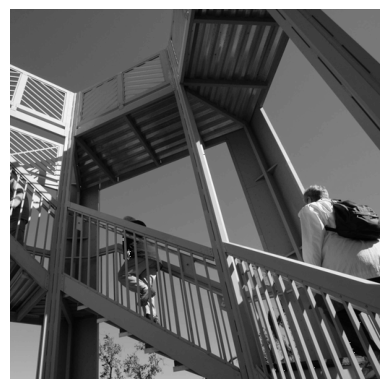

In [ ]:
import matplotlib.pyplot as plt

# Visualize the image
plt.grid(False)
# plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [ ]:
import numpy as np

# Copy image to a numpy array
image_transformed = np.copy(ascent_image)

# Get the dimensions of the image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]
print(size_x, size_y,image_transformed)

Streaming output truncated to the last 5000 lines.
   74  67  68  74  76  77  78  78  77  78  78  77  78  78  78  78  78  78
   76  75  77  77  75  75  75  75  75  75  75  75  75  75  77  78  78  78
   78  77  75  77  78  78  78  75  72  75  84 108 144 184 213 231 236 233
  230 230 231 232 221 193 155 123  94  77  73  76  81  82  79  75  78  79
   79  77  71  66  65  71  80  84  83  86  77  51  25  20  24  27  23  36
   81  85  82  83  84  59  47  38  87 152 148 145 142 139 137 138 139 136
  137 130 130 134 128 115 111 117 112  99  95 101 103  98  94  96  79  63
   74  81  84  89  99 110 110 110 108 108 107 109 111 108 107 108 107 105
  105 105 105 105 105 105  99  99 101  98 100 100 100 101 102 100  96  95
   93  93  93  92  90  91  90  91  90  87  88  90 116 153 150 149 184 193
  194 205 208 207 213 218 210 217 218 211 223 228 198 204 220 228 227 220
  220 222 217 220 223 223 229 237]
 [ 40  54  65  64  63  65  66  66  68  68  68  68  68  69  71  71  71  71
   71  71  71  71  70  68 

In [ ]:
# Experiment with different values and see the effect
# filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [ ]:
# Iterate over the image
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
      convolution = convolution + (ascent_image[x-1, y] * filter[0][1])
      convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])
      convolution = convolution + (ascent_image[x, y-1] * filter[1][0])
      convolution = convolution + (ascent_image[x, y] * filter[1][1])
      convolution = convolution + (ascent_image[x, y+1] * filter[1][2])
      convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])
      convolution = convolution + (ascent_image[x+1, y] * filter[2][1])
      convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])

      # Multiply by weight
      convolution = convolution * weight

      # Check the boundaries of the pixel values
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255

      # Load into the transformed image
      image_transformed[x, y] = convolution

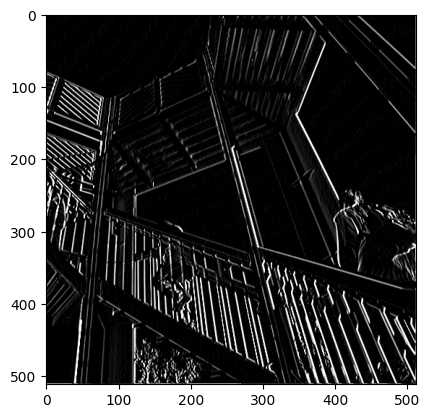

In [ ]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()

256 256
[ 83  83  83  83  83  83  83  82  82  82  82  82  82  82  82  82  82  83
  83  83  83  83  83  83  82  82  82  82  82  82  82  82  82  85  86  85
  85  85  86  86  86  85  85  85  85  85  85  85  85  85  85  85  85  85
  85  85  85  85  86  84  85  86  85  85  85  85  86  88  87  87  87  87
  87  87  87  87  87  87  87  87  87  87  87  87  87  87  87  87  87  87
  87  87  87  87  89  91  90  91  90  90  90  90  91  88  87  90  90  90
  90  90  90  90  90  90  90  90  90  90  90  90  90  91  91  90  90  90
  90  90  90  91  92  92  92  92  92  92  92  92  92  92  92  92  92  92
  92  92  92  92  92  92  92  92  92  92  92  93  95  95  96  93  92  95
  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95
  95  95  95  95  95  95  95  95  95  97  97  97  97  97  97  97  97  97
  97  97  97  97  97  97  97  97  97  97  97  97  97  97 100 100  97  97
  97  99 101 100 100 100 100 101  98  94  79  81  82  84  82  86  84  86
  78  82  77  79  73  80  89  88  82  80  8

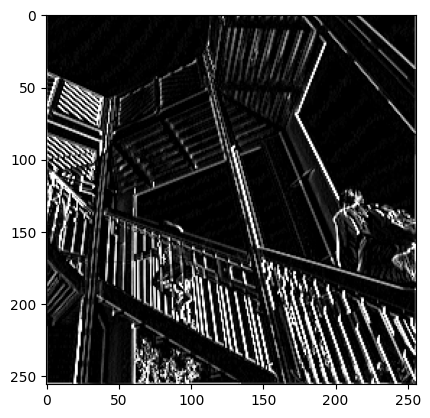

In [ ]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

print(new_x,new_y)

# Iterate over the image
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):

    # Store all the pixel values in the (2,2) pool
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    # Get only the largest value and assign to the reduced image
    newImage[int(x/2),int(y/2)] = max(pixels)
np.set_printoptions(threshold=np.inf)
print(image_transformed[0],image_transformed[1])
print(newImage[0])
# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()